In [ ]:
!pip install tensorflow-text==2.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 93.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing inst

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,r2_score ,mean_squared_log_error
from sklearn.model_selection import train_test_split
import numpy as np
import math
import pandas as pd
from datetime import datetime , timedelta

path = '/content/drive/MyDrive/M2TECH/2022/raw_data/short/'

In [32]:
# valid_minors = [ 30558,30421,30430,30528,30530,30534,30535,30538,30539,30540,30541,30547,30549,30550,30556,30557,30559]

# act_dist = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 4,5,6,7]

valid_minors = [ 30558,30421,30430,30528,30530,30534,30535,30538,30539,30540,30541,30547,30549,30559]

act_dist = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3,4]


actual_dist_dict = {
    30558:0.25,
    30421:0.5,
    30430:0.75,
    30528:1,
    30530:1.25,
    30534:1.5,
    30535:1.75,
    30538:2,
    30539:2.25,
    30540:2.5,
    30541:2.75,
    30547:3,
    30549:4,
    30550:5,
    30556:6,
    30557:7,
    30559:1, # 17
}
time_list = []
est_dist = []
iBeacon_dist = []
rssi_list = []
x_raws=[]
minor_list = []


for minor in range(0,13):
    #if minor in valid_minors:
    df = pd.read_csv(path + 'beacon_dataset_preprocessed_' + str( act_dist[minor] ) +'.csv' , delimiter = ',')
    print('beacon_dataset_preprocessed_'+str(act_dist[minor]) +'.csv')
    time_list.append( df['time'] )
    rssi_list.append( df['rssi'] )
    est_dist.append(df['est_dist']) 
    iBeacon_dist.append(df['iBeacon_dist'])
    minor_list.append( df['minor'] )
    lt = []
    print(len(rssi_list[minor]))
    print(minor)
    # else:
    #     lt = []
    #     time_list.append([])
    #     rssi_list.append([])
    #     minor_list.append([])
    for index in range (0 , len(rssi_list[minor]) ):
        time_list[minor][index] 
        lt.append( [ rssi_list[minor][index] , datetime.strptime(time_list[minor][index] , '%Y-%m-%d %H:%M:%S') , minor_list[minor][index] ] )
    x_raws.append(lt)

x_raws = np.array(x_raws)


beacon_dataset_preprocessed_0.25.csv
68072
0
beacon_dataset_preprocessed_0.5.csv
69242
1
beacon_dataset_preprocessed_0.75.csv
72178
2
beacon_dataset_preprocessed_1.csv
72060
3
beacon_dataset_preprocessed_1.25.csv
72177
4
beacon_dataset_preprocessed_1.5.csv
72178
5
beacon_dataset_preprocessed_1.75.csv
72178
6
beacon_dataset_preprocessed_2.csv
72178
7
beacon_dataset_preprocessed_2.25.csv
72178
8
beacon_dataset_preprocessed_2.5.csv
72177
9
beacon_dataset_preprocessed_2.75.csv
72178
10
beacon_dataset_preprocessed_3.csv
72178
11
beacon_dataset_preprocessed_4.csv
72178
12


<ipython-input-32-650fb0bad98b>:59: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_raws = np.array(x_raws)


In [ ]:
print(x_raws)

[]


In [20]:
# x_raw_data = []
# y_data = []

# five_sec = datetime.timedelta(seconds= 5)

# for minor in range(0,17):
#     if minor in valid_minors:
#         print(minor)
#         std_time = x_raws[minor][0][1]
#         for index in range(len(x_raws[minor])):
#             if index == 0:
#                 lt = []
#             if std_time+five_sec > x_raws[minor][index][1]:
#                 lt.append(x_raws[minor][index][0])
#                 if len(lt) == 5: 
#                     x_raw_data.append(lt)
#                     if minor == 0:
#                         y_data.append([1.0])
#                     else:
#                         y_data.append([minor*0.5])
#                     lt = []
#             else:
#                 if len(lt)!=0:
#                     x_raw_data.append(lt)
#                     if minor == 0:
#                         y_data.append([1.0])
#                     else:
#                         y_data.append([minor*0.5])
#                 lt = []
#                 lt.append(x_raws[minor][index][0])
#                 std_time = x_raws[minor][index][1]

x_raw_data = []
y_data = []

five_sec = timedelta(seconds= 5)

for minor in range(0,13):

    print(minor)
    std_time = x_raws[minor][0][1]
    for index in range(len(x_raws[minor])):
        if index == 0:
            lt = []
        if std_time+five_sec > x_raws[minor][index][1]:
            lt.append(x_raws[minor][index][0])
            if len(lt) == 5: 
                x_raw_data.append(lt)
                y_data.append(act_dist[minor])
                lt = []
        else:
            if len(lt)!=0:
                x_raw_data.append(lt)

                y_data.append(act_dist[minor])
            lt = []
            lt.append(x_raws[minor][index][0])
            std_time = x_raws[minor][index][1]



x_raw_data = np.array(x_raw_data)

x_data = pad_sequences(x_raw_data,padding='post')

x_data = np.array(x_data)
y_data = np.array(y_data)

print(x_data)
print(y_data)

print(len(x_data))
print(len(y_data))

print(x_data.shape)
print(y_data.shape)



0
1
2
3
4
5
6
7
8
9
10
11
12
[[-63 -60 -55 -54 -54]
 [-56 -56 -55 -55 -60]
 [-55 -61 -55 -55 -54]
 ...
 [-76 -76 -76 -76 -76]
 [-76 -76 -76 -76 -76]
 [-76 -76 -76 -76 -76]]
[0.25000000 0.25000000 0.25000000 ... 4.00000000 4.00000000 4.00000000]
191038
191038
(191038, 5)
(191038,)


In [ ]:
# ###################################
#                  데이터 전처리                  #     
#                      사용 X                     #
# ###################################

# unique_info = 'beacon_unique_info_tb.csv'
# raw_cel = 'raw_data'
# import sys
# import numpy as np


# x_raws = []
# y_raws = []
# df = pd.DataFrame()
# rssi_list = []
# lt1 = []
# y_rawdata = []
# for k in range(0,16):
#   df = pd.read_csv(path + raw_cel + str(k) +'.csv' , delimiter = ',')
#   rssi_list.append(df['rssi'])

# sum = 0



# for minor in range(0,16):
    
#     while True:
#         if len(rssi_list[minor]) % 3 != 0:
#             remove_index = len(rssi_list[minor])
#             del(rssi_list[minor][remove_index-1])
#         else:
#             k = int(len(rssi_list[minor])/3)
        
#             # if minor == 0:
#             #     index = 1
#             # else:
#             #     index = minor - 1

#             # lt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#             # lt[index] = 1

#             if minor == 0:
#                 dist = 1.0
#             else:
#                 dist = minor*0.5
            
#             lt=[]
#             lt.append(dist)

#             for i in range(0, k):
#                 lt1.append(lt)
#             print(lt)
#             break
#     x_raws.append( np.array(rssi_list[minor]).reshape(-1,3) )  #x_raws는 3차원 배열 x_raws[minor][row][col]
    



# #print(x_raws)
# #print(y_raws)

# x = []
# y = []

# for minor in range(0,16):
#     for row in range(0,len(x_raws[minor])):
#         x.append(x_raws[minor][row])
#         #y.append(y_raws[minor][row])

# x_data =np.array(x)
# y_data =np.array(lt1)

# print(lt1[20])

# print(len(x_data))
# print(y_data.shape)
# print(x_data)



In [21]:
def Distance_Propose_Model():
    model = Sequential()
    
    model.add(Dense(64,input_shape=(5,) ,activation='relu' ))
    model.add(layers.BatchNormalization()) 
    model.add(layers.Dropout(0.05))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(1))
    return model


In [22]:
x_train , x_test , y_train , y_test = train_test_split(x_data,y_data ,train_size=0.7 , random_state=42)

rmsle =tf.keras.losses.MeanSquaredLogarithmicError()

In [ ]:
model = Distance_Propose_Model()

model.compile(loss = rmsle , optimizer=Adam(learning_rate=0.0001) ,metrics=['mean_squared_error'] )
history = model.fit(x_train , y_train , batch_size=200 , epochs= 200 , validation_data= (x_test , y_test) , verbose=1)

model.summary()

Epoch 1/200
652/652 [==============================] - 4s 4ms/step - loss: 0.1491 - mean_squared_error: 1.1286 - val_loss: 0.0548 - val_mean_squared_error: 0.5220
Epoch 2/200
652/652 [==============================] - 2s 4ms/step - loss: 0.0541 - mean_squared_error: 0.5240 - val_loss: 0.0492 - val_mean_squared_error: 0.4521
Epoch 3/200
652/652 [==============================] - 3s 4ms/step - loss: 0.0496 - mean_squared_error: 0.4750 - val_loss: 0.0454 - val_mean_squared_error: 0.4247
Epoch 4/200
652/652 [==============================] - 2s 3ms/step - loss: 0.0473 - mean_squared_error: 0.4511 - val_loss: 0.0437 - val_mean_squared_error: 0.4128
Epoch 5/200
652/652 [==============================] - 2s 4ms/step - loss: 0.0457 - mean_squared_error: 0.4362 - val_loss: 0.0429 - val_mean_squared_error: 0.3970
Epoch 6/200
652/652 [==============================] - 3s 4ms/step - loss: 0.0449 - mean_squared_error: 0.4275 - val_loss: 0.0422 - val_mean_squared_error: 0.3974
Epoch 7/200
652/652 [=

In [9]:
model.save('/content/drive/MyDrive/M2TECH/2022/code/Short_ANN_Filter_model.h5')

# # 손실 함수 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

NameError: ignored

In [23]:
model = tf.keras.models.load_model('/content/drive/MyDrive/M2TECH/2022/code/Long_ANN_Filter_model.h5')

np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.8f}".format(x)})
res=model.evaluate(x_test,y_test,verbose=0)

y_pred = model.predict(x_test, batch_size=100)

from sklearn.metrics import mean_squared_error ,r2_score ,mean_squared_log_error
r2 = r2_score(y_test,y_pred)
print('R2 : ',r2)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE :", rmse)


for kk in range(0, len(y_pred)):
    if y_pred[kk] < 0 :
        y_pred[kk] = 0


rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print("RMSLE :", rmsle)     #상대적 Error를 측정해준다.

f = open(path+'output.csv' , "w" , newline='')
writer = csv.writer(f)
for kk in range(len(y_pred)):
    writer.writerow([x_test[kk] , y_test[kk] , y_pred[kk]])
f.close()



574/574 [==============================] - 1s 1ms/step
R2 :  0.646594831278523
RMSE : 0.6179419154564927
RMSLE : 0.20746587414367418


[[-47, -47, -47, -47, -47], [-48, -48, -48, -48, -48], [-49, -49, -49, -49, -49], [-50, -50, -50, -50, -50], [-51, -51, -51, -51, -51], [-52, -52, -52, -52, -52], [-53, -53, -53, -53, -53], [-54, -54, -54, -54, -54], [-55, -55, -55, -55, -55], [-56, -56, -56, -56, -56], [-57, -57, -57, -57, -57], [-58, -58, -58, -58, -58], [-59, -59, -59, -59, -59], [-60, -60, -60, -60, -60], [-61, -61, -61, -61, -61], [-62, -62, -62, -62, -62], [-63, -63, -63, -63, -63], [-64, -64, -64, -64, -64], [-65, -65, -65, -65, -65], [-66, -66, -66, -66, -66], [-67, -67, -67, -67, -67], [-68, -68, -68, -68, -68], [-69, -69, -69, -69, -69], [-70, -70, -70, -70, -70], [-71, -71, -71, -71, -71], [-72, -72, -72, -72, -72], [-73, -73, -73, -73, -73], [-74, -74, -74, -74, -74], [-75, -75, -75, -75, -75], [-76, -76, -76, -76, -76], [-77, -77, -77, -77, -77], [-78, -78, -78, -78, -78], [-79, -79, -79, -79, -79], [-80, -80, -80, -80, -80], [-81, -81, -81, -81, -81], [-82, -82, -82, -82, -82], [-83, -83, -83, -83, -83], 

<ipython-input-39-e7852dbc709a>:122: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(rssi, y_cal,'r.' ,marker = '*')
<ipython-input-39-e7852dbc709a>:123: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(beacon_data_df['rssi'], beacon_data_df['iBeacon_dist'],'b.',marker="x")


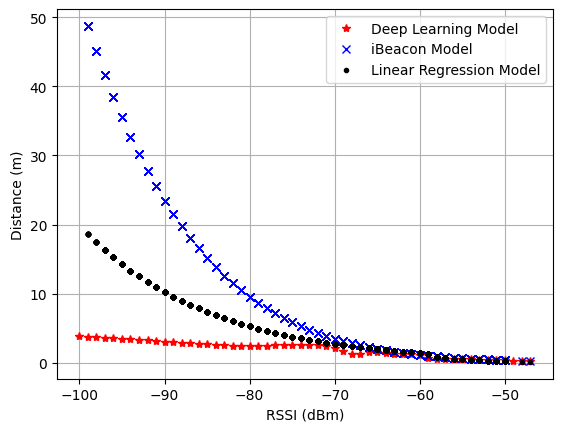

In [39]:
x_data = []
rssi = []
for kk in range(47,101):
    kk *= -1
    rssi.append(kk)
    x_data.append([kk,kk,kk,kk,kk])
print(x_data)

y_cal = model.predict(x_data, batch_size=5)



path = '/content/drive/MyDrive/M2TECH/2022/raw_data/long/'

#valid_minors = [1,2,3,4,5,6,7,8,9,10,12,14,16]


valid_minors = [ 30558,30421,30430,30528,30530,30534,30535,30538,30539,30540,30541,30547,30549,30550,30556,30557,30559]

act_dist = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 4, 5, 6, 7]
actual_dist_dict = {
    30558:0.25,
    30421:0.5,
    30430:0.75,
    30528:1,
    30530:1.25,
    30534:1.5,
    30535:1.75,
    30538:2,
    30539:2.25,
    30540:2.5,
    30541:2.75,
    30547:3,
    30549:4,
    30550:5,
    30556:6,
    30557:7,
    30559:1, # 17
}



# valid_minors = [ 30558,30421,30430,30528,30530,30534,30535,30538,30539,30540,30541,30547,30549,30559]

# act_dist = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3,7,1]
# actual_dist_dict = {
#     30558:0.25,
#     30421:0.5,
#     30430:0.75,
#     30528:1,
#     30530:1.25,
#     30534:1.5,
#     30535:1.75,
#     30538:2,
#     30539:2.25,
#     30540:2.5,
#     30541:2.75,
#     30547:3,
#     30549:4,
#     30559:1, # 
# }





est_dist = []
iBeacon_dist = []
rssi_list = []
minor_list = []


# for minor in range(0,16):
#     #if minor in valid_minors:
#     df = pd.read_csv(path + 'beacon_dataset_preprocessed_' + str( act_dist[minor] ) +'.csv' , delimiter = ',')
#     print('beacon_dataset_preprocessed_'+str(act_dist[minor]) +'.csv')
#     time_list.append( df['time'] )
#     rssi_list.append( df['rssi'] )
#     est_dist.append(df['est_dist']) 
#     iBeacon_dist.append(df['iBeacon_dist'])
# #     minor_list.append( df['minor'] )
# #     lt = []
# #     print(len(rssi_list[minor]))
# #     print(minor)
# #     # else:
# #     #     lt = []
# #     #     time_list.append([])
# #     #     rssi_list.append([])
# #     #     minor_list.append([])
# #     for index in range (0 , len(rssi_list[minor]) ):
# #         time_list[minor][index] 
# #         lt.append( [ rssi_list[minor][index] , datetime.strptime(time_list[minor][index] , '%Y-%m-%d %H:%M:%S') , minor_list[minor][index] ] )
# #     x_raws.append(lt)

# # x_raws = np.array(x_raws)

ble_tag_data_file = 'ble_tag_data_tbl_1-2000000.csv' # Long Range BLE Tag 수집 데이터
#ble_tag_data_file = 'preprocessed_short.csv'
beacon_data_df = pd.read_csv(path + ble_tag_data_file, delimiter=';')
#beacon_data_df = pd.read_csv(path + ble_tag_data_file, delimiter=',')
print(path + ble_tag_data_file)
print(beacon_data_df.head)

idx = beacon_data_df[(beacon_data_df['rssi'] <= -100.0)].index
beacon_data_df = beacon_data_df.drop(idx)


beacon_data_df['iBeacon_dist'] = 0.89976 * (beacon_data_df['rssi']/-59) ** 7.7095 + 0.111 # update



for kk in range(0,17):
    ind = beacon_data_df[(beacon_data_df['minor'] == valid_minors[kk])].index
    df = pd.DataFrame(ind)
    est = beacon_data_df['iBeacon_dist'].values
    act = np.full((len(est)),actual_dist_dict[valid_minors[kk]])
    rmsle = np.sqrt(mean_squared_log_error(act,est))
    print(valid_minors[kk]," RMSLE :", rmsle)     #상대적 Error를 측정해준다.



plt.plot(rssi, y_cal,'r.' ,marker = '*')
plt.plot(beacon_data_df['rssi'], beacon_data_df['iBeacon_dist'],'b.',marker="x")
plt.plot(beacon_data_df['rssi'], beacon_data_df['est_dist'],'k.')
plt.xlabel('RSSI (dBm)')
plt.ylabel('Distance (m)')
plt.legend(['Deep Learning Model','iBeacon Model','Linear Regression Model'])
plt.grid(True)
#plt.savefig('Short_range_RSSI-Distance.png')
plt.show()


# plt.plot(rssi, y_cal,'b.',marker="x")

# plt.xlabel('RSSI (dBm)')
# plt.ylabel('Distance (m)')
# plt.legend(['iBeacon Model','Linear Regression Model'])
# plt.grid(True)
# plt.savefig('short_range_RSSI-Distance.png')
# plt.show()





In [ ]:
plt.figure(dpi = 150)
plt.plot(y_test , y_test , 'r-')
plt.plot(y_test, y_pred , 'k.' , alpha = 0.01)
plt.xlabel("Real_Dist")
plt.ylabel("Calculate Dist")
plt.show()